In [198]:
# Based on MAC0417/5768 Visão e Processamento de Imagens
# from Prof. Dr. Paulo A. V. de Miranda

# Plot inline
%matplotlib inline
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

def to_255_image(image):
    Imax = image.max()
    image = np.floor(255*(image/float(Imax)))
    image = image.astype(np.uint8)
    return image

class Spectrum:
    def __init__(self, spectrum):
        self.spectrum = spectrum
    def visualization_mode(self):
        return to_255_image(20*np.log(1+np.abs(self.spectrum)))
    def get_image(self):
        spectrum_shift_back = np.fft.ifftshift(self.spectrum)
        img_back = np.fft.ifft2(spectrum_shift_back)
        return img_back
    # Statics
    @staticmethod
    def to_fourier_spectrum(image):
        f_image = np.fft.fft2(image)
        shift = np.fft.fftshift(f_image)
        return Spectrum(shift)
    

def threshold_image(image, level):
    Imax = image.max()
    limit = level*float(Imax)
    print(limit)
    image = np.where(image >limit, 1, 0)
    return image
    
def get_window_statistics(image, kernel_size, i, j):
    half = int(kernel_size)/2
    start_i = i - half
    start_j = j - half
    end_i = i + half + 1
    end_j = j + half + 1
    
    sum = 0.0
    max = 0
    count = kernel_size*kernel_size - 1
    
    for border_i in range(start_i, end_i):
        for border_j in range(start_j, end_j):
            if border_i == i and border_j == j:
                continue
            current_value = image[border_i,border_j]
            sum += current_value
            if np.abs(current_value) > max:
                max = current_value
    return (sum/count, max)
        
    
def noise_filtered_image(image, kernel_size):
    if kernel_size % 2 == 0:
        raise "kernel_size should be odd"
    real_image = np.copy(image.real)

    start_i = kernel_size/2
    start_j = kernel_size/2
    end_i = real_image.shape[0] - start_i
    end_j = real_image.shape[1] - start_j
    
    centers = []
    centers.append((real_image.shape[0] / 2, real_image.shape[1] / 2))
    centers.append((real_image.shape[0] / 2 + 1, real_image.shape[1] / 2))
    centers.append((real_image.shape[0] / 2, real_image.shape[1] / 2 + 1))
    centers.append((real_image.shape[0] / 2 + 1, real_image.shape[1] / 2 + 1))
    
    selected = []
    
    for i in range(start_i, end_i):
        for j in range(start_j, end_j):
            if (i,j) in centers:
                continue
            center_value = np.abs(real_image[i,j])
            window_average, max = get_window_statistics(real_image, kernel_size, i, j)
            
            if center_value < min:
                selected.append((i,j,center_value,window_average))
                real_image[i,j] = window_average
    print(len(selected))
    if selected > 10: print(selected[0:10])
    return real_image + image.imag * 1j

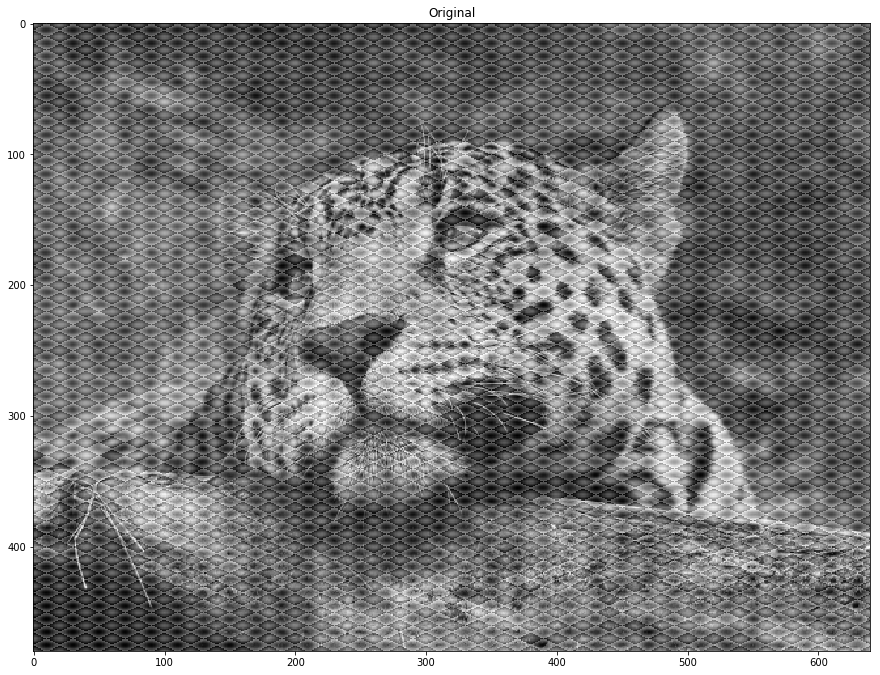

153.0


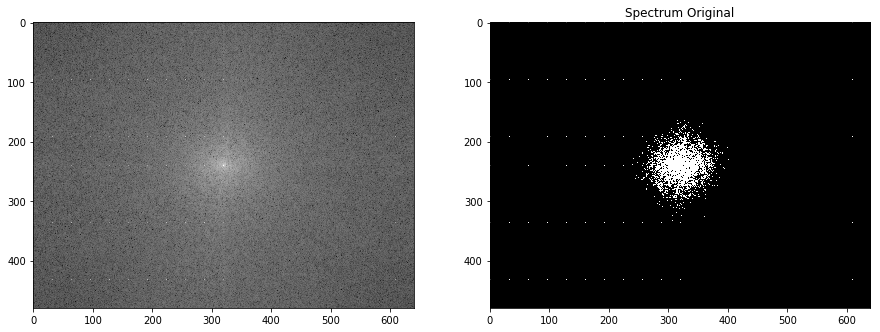

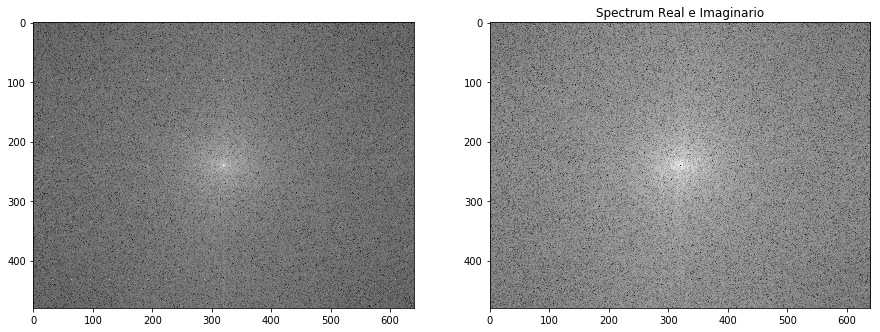

298300
[(4, 4, 1763.583451851186, 2808.842350327358), (4, 5, 625.5737457471236, 1105.2035733525033), (4, 6, 1029.947222318524, 1167.8761959813335), (4, 7, 451.72427771385355, 1178.6950565629454), (4, 8, 1272.5620725535491, 1204.6132259938695), (4, 9, 455.49280836961384, 1203.3618285385614), (4, 10, 168.91915555075184, 1239.059354772554), (4, 11, 1428.0521036208004, 1212.2286462378038), (4, 12, 1177.3700743239353, 1203.345420419945), (4, 13, 1106.4921366012381, 1182.0692691018364)]
153.0


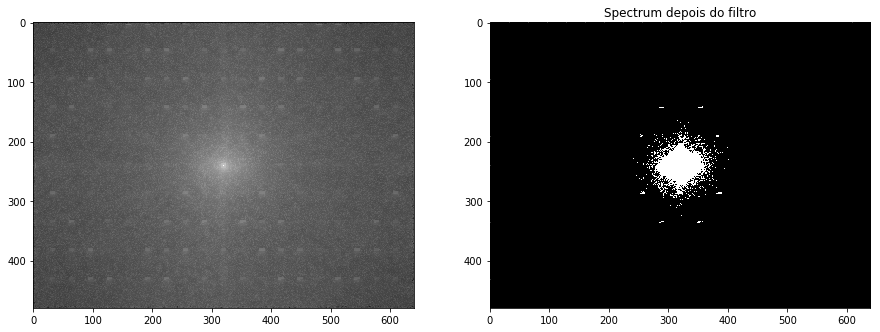

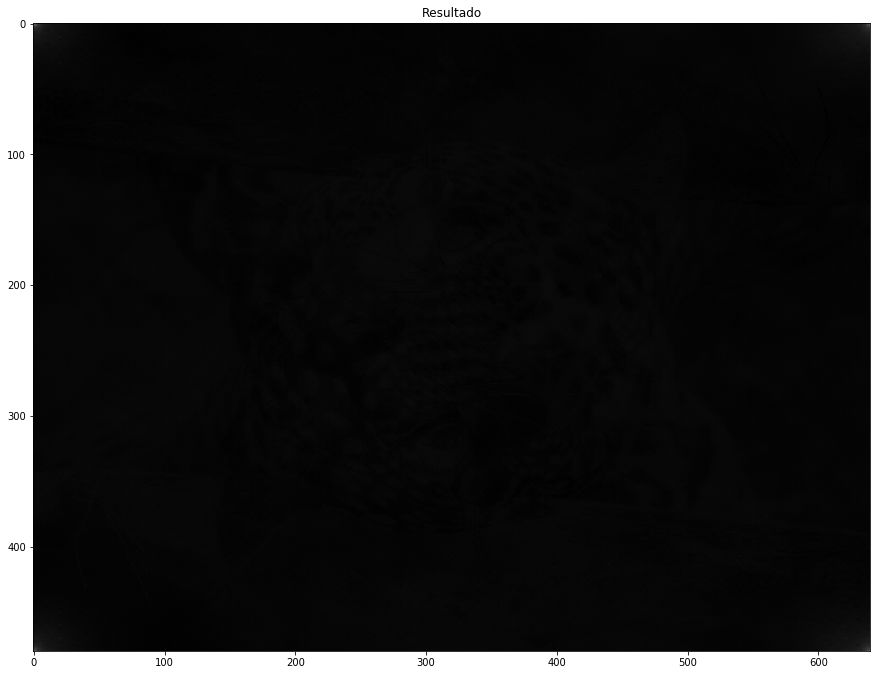

In [199]:

original_img = cv2.imread('../EP2/leopard_noise.png', cv2.IMREAD_GRAYSCALE)
original_img = original_img.astype(np.float64)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(original_img, cmap='gray')
plt.title('Original')
plt.show()

spectrum = Spectrum.to_fourier_spectrum(original_img)

spectrum_original = spectrum.visualization_mode()
threshold_spectrum = threshold_image(spectrum_original, 0.60)

fig, imgs = plt.subplots(1,2, figsize=(15,10))
imgs[0].imshow(spectrum_original, cmap='gray')
imgs[1].imshow(threshold_spectrum, cmap='gray')
plt.title('Spectrum Original')
plt.show()

fig, imgs = plt.subplots(1,2, figsize=(15,10))
imgs[0].imshow(to_255_image(20*np.log(1+np.abs(spectrum.spectrum.real))), cmap='gray')
imgs[1].imshow(to_255_image(20*np.log(1+np.abs(spectrum.spectrum.imag))), cmap='gray')
plt.title('Spectrum Real e Imaginario')
plt.show()



filtered_spectrum = Spectrum(noise_filtered_image(spectrum.spectrum, 7))

visual_filtered_spectrum = filtered_spectrum.visualization_mode()
threshold_filtered_spectrum  = threshold_image(visual_filtered_spectrum, 0.60)

fig, imgs = plt.subplots(1,2, figsize=(15,10))
imgs[0].imshow(visual_filtered_spectrum, cmap='gray')
imgs[1].imshow(threshold_filtered_spectrum, cmap='gray')
plt.title('Spectrum depois do filtro')
plt.show()

image_back = filtered_spectrum.get_image()
image_back = image_back.real.astype(np.float64)
                                    
fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(image_back, cmap='gray')
plt.title('Resultado')
plt.show()

(133407.99999999965-2.3931079340400174e-11j)
133407.99999999965
-2.3931079340400174e-11
(133407.99999999965-2.3931079340400174e-11j)


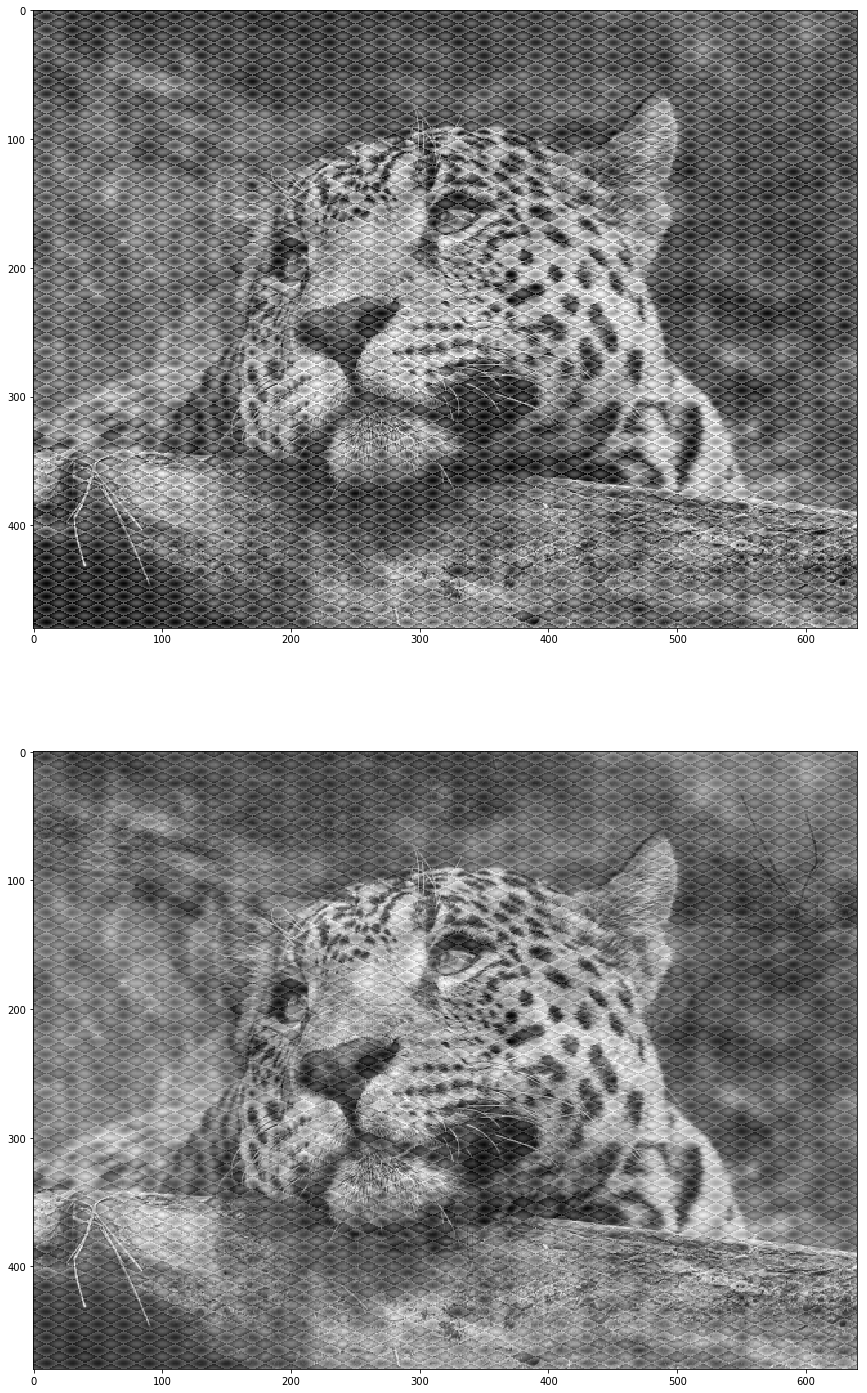

In [104]:
original_img = cv2.imread('../EP2/leopard_noise.png', cv2.IMREAD_GRAYSCALE)
original_img = original_img.astype(np.float64)

spectrum = Spectrum.to_fourier_spectrum(original_img)

print (spectrum.spectrum[0,0])
print (spectrum.spectrum[0,0].real)
print (spectrum.spectrum[0,0].imag)
print (spectrum.spectrum[0,0].real + spectrum.spectrum[0,0].imag*1j)

spectrum_real = Spectrum(spectrum.spectrum.real*0.5 + spectrum.spectrum.imag*1j)

image_back = spectrum_real.get_image()
image_back = image_back.real.astype(np.float64)


fig, imgs = plt.subplots(2,1, figsize=(15,25))
imgs[0].imshow(original_img, cmap='gray')
imgs[1].imshow(image_back, cmap='gray')
plt.show()

In [62]:

def get_window_average(image, kernel_size, i, j):
    half = int(kernel_size)/2
    start_i = i - half
    start_j = j - half
    end_i = i + half
    end_j = j + half
    
    sum = 0.0
    count = kernel_size*kernel_size - 1
    
    for border_i in range(start_i, end_i+1):
        for border_j in range(start_j, end_j+1):
            if border_i == i and border_j == j:
                next
            print((border_i,border_j,image[border_i,border_j]))
            sum += image[border_i,border_j]
            
    return sum/count

image = np.zeros((5,5))
image[2,1] = 1
image[2,2] = 2
image[2,3] = 3
image[2,4] = 3
print(get_window_average(image, 3, 2, 2))

(1, 1, 0.0)
(1, 2, 0.0)
(1, 3, 0.0)
(2, 1, 1.0)
(2, 2, 2.0)
(2, 3, 3.0)
(3, 1, 0.0)
(3, 2, 0.0)
(3, 3, 0.0)
0.75


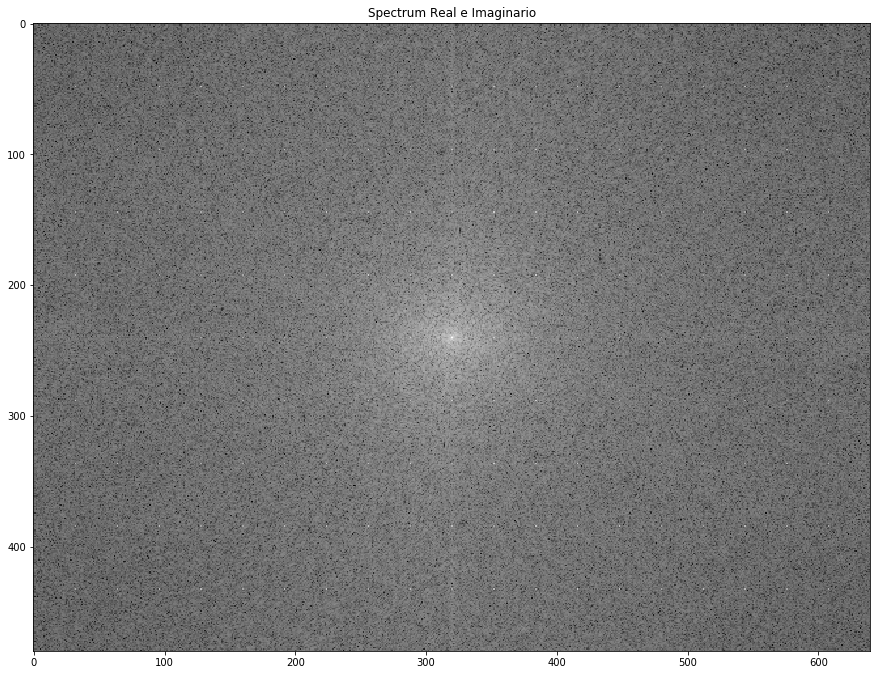

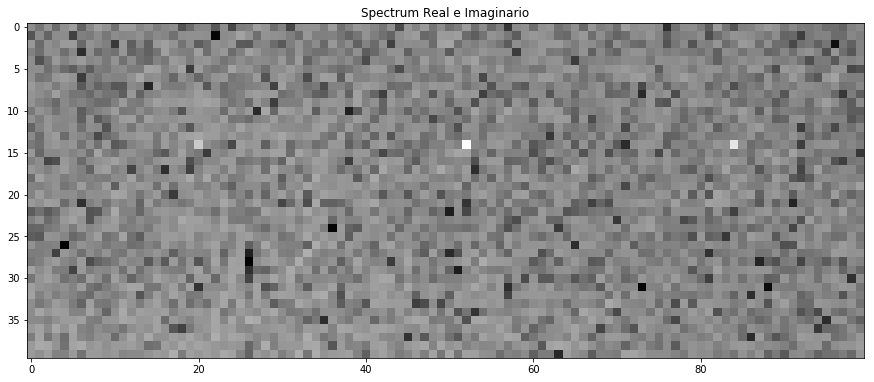

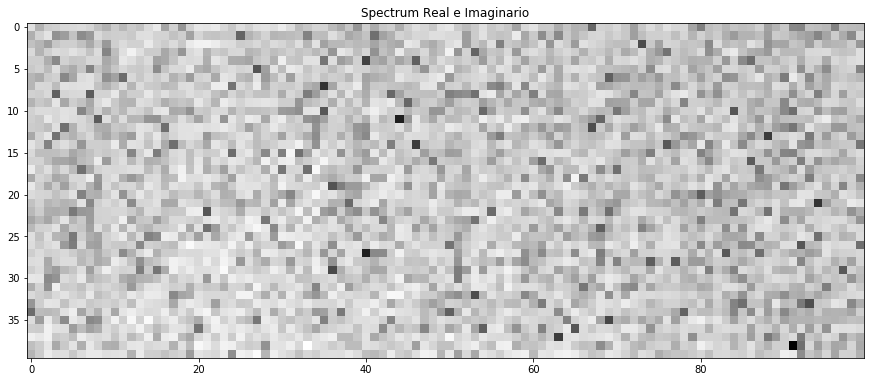

48
[(5, 24, 169207.2623435379, 146550.55463981026), (6, 62, 161598.72395036562, 145447.70762404887), (6, 73, 163855.4769672781, 146272.49078687682), (8, 39, 166732.22952306058, 145784.16800542743), (9, 21, 168664.88963174753, 145486.09531564423), (9, 39, 166645.89974240097, 145140.84906318208), (9, 79, 159035.28549913954, 145690.26669000293), (10, 57, 168787.6483515444, 144995.37773004975), (10, 61, 160286.16159387992, 145324.32947803527), (11, 64, 160186.40672276507, 145444.57191228136)]


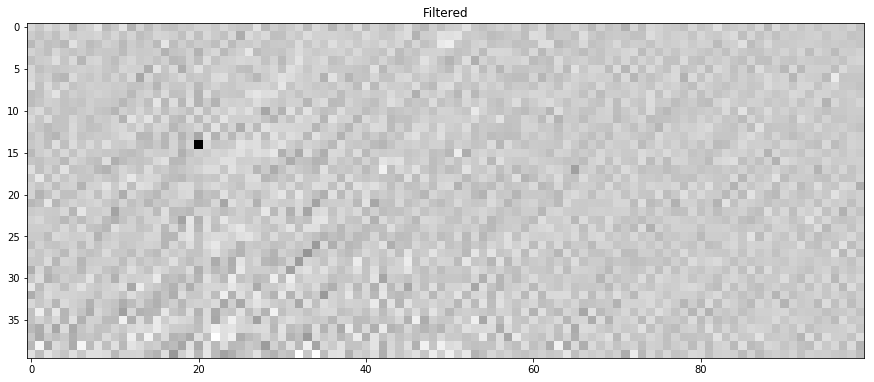

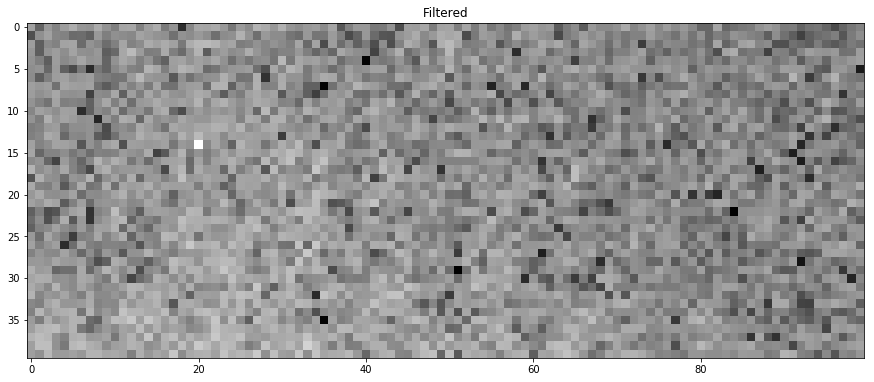

In [174]:

original_img = cv2.imread('../EP2/leopard_noise.png', cv2.IMREAD_GRAYSCALE)
original_img = original_img.astype(np.float64)

spectrum = Spectrum.to_fourier_spectrum(original_img)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(to_255_image(20*np.log(1+np.abs(spectrum.spectrum.real))), cmap='gray')
plt.title('Spectrum Real e Imaginario')
plt.show()

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(to_255_image(20*np.log(1+np.abs(spectrum.spectrum.real)))[130:170,300:400], cmap='gray')
plt.title('Spectrum Real e Imaginario')
plt.show()

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(to_255_image(20*np.log(1+np.abs(spectrum.spectrum.imag)))[130:170,300:400], cmap='gray')
plt.title('Spectrum Real e Imaginario')
plt.show()

filtered = noise_filtered_image(spectrum.spectrum.real[130:170,300:400] + spectrum.spectrum.imag[130:170,300:400]*1j, 9)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(filtered.real, cmap='gray')
plt.title('Filtered')
plt.show()

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(to_255_image(20*np.log(1+np.abs(filtered))), cmap='gray')
plt.title('Filtered')
plt.show()

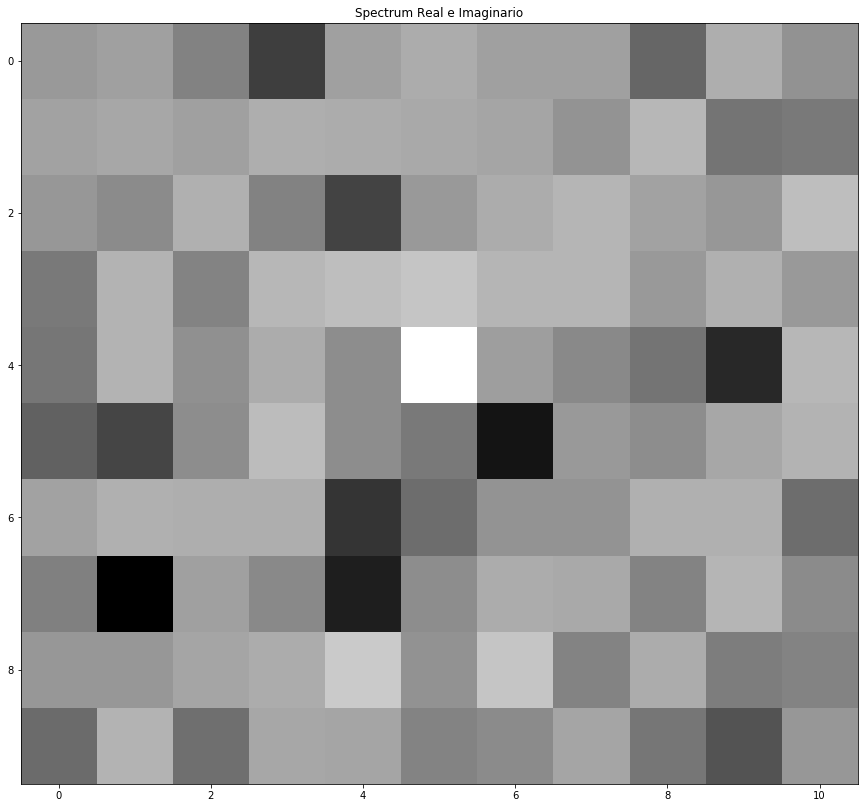

[[130 133 120  91 133 138 133 133 108 139 127]
 [134 136 133 139 138 137 135 128 143 114 116]
 [129 124 140 120  93 130 138 142 134 129 146]
 [116 141 121 143 146 149 142 142 130 140 130]
 [115 141 126 138 125 174 132 123 114  82 143]
 [106  94 125 145 125 116  73 130 125 136 141]
 [134 140 139 139  87 111 128 128 140 140 111]
 [119  64 133 123  77 125 138 137 121 142 124]
 [129 129 135 138 151 127 149 121 138 118 121]
 [110 141 112 136 135 121 124 135 115 100 129]]
174


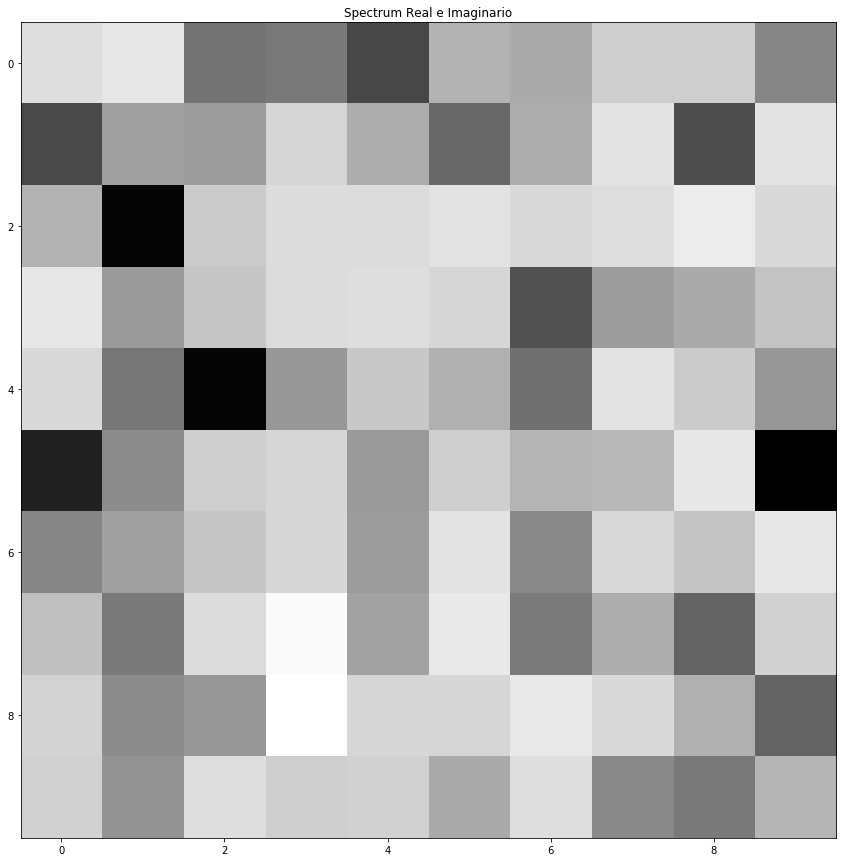

1
[(4, 5, 0.0, 146708.19911656974)]


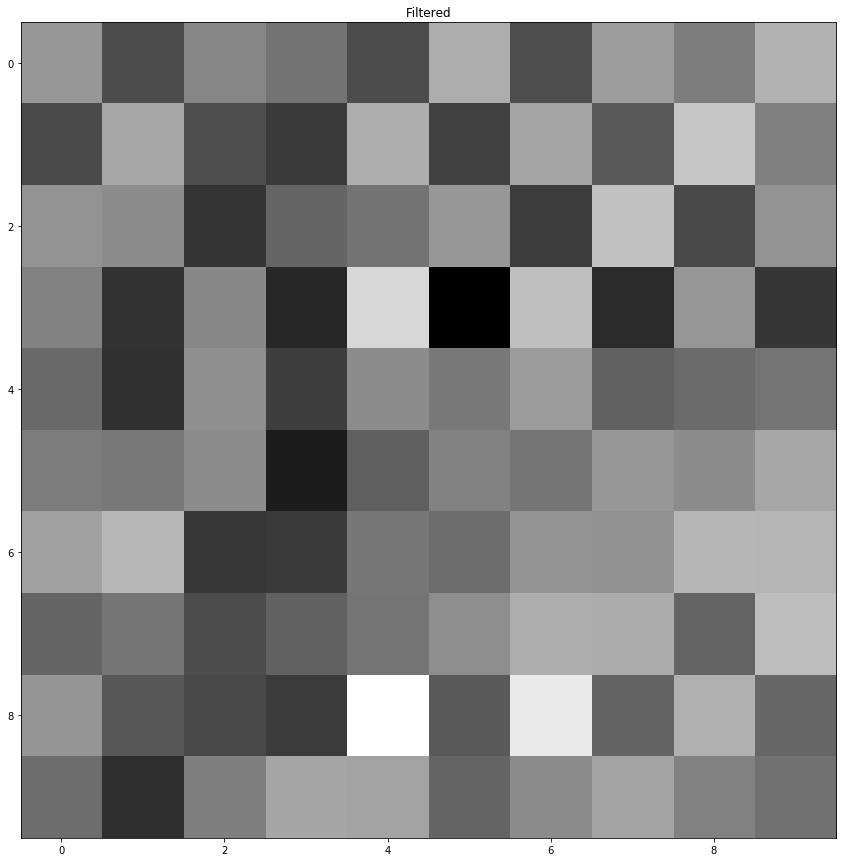

AttributeError: 'module' object has no attribute 'int128'

In [194]:

original_img = cv2.imread('../EP2/leopard_noise.png', cv2.IMREAD_GRAYSCALE)
original_img = original_img.astype(np.float64)

spectrum = Spectrum.to_fourier_spectrum(original_img)


fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(to_255_image(20*np.log(1+np.abs(spectrum.spectrum.real)))[140:150,315:326], cmap='gray')
plt.title('Spectrum Real e Imaginario')
plt.show()

print to_255_image(20*np.log(1+np.abs(spectrum.spectrum.real)))[140:150,315:326]
print to_255_image(20*np.log(1+np.abs(spectrum.spectrum.real)))[140:150,315:326].max()

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(to_255_image(20*np.log(1+np.abs(spectrum.spectrum.imag)))[140:150,315:325], cmap='gray')
plt.title('Spectrum Real e Imaginario')
plt.show()

filtered = noise_filtered_image(spectrum.spectrum.real[140:150,315:325] + spectrum.spectrum.imag[140:150,315:325]*1j, 9)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(filtered.real, cmap='gray')
plt.title('Filtered')
plt.show()

print filtered.real[140:150,315:325].astype(np.int128)
print filtered.real[140:150,315:325].astype(np.int128).max()

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(to_255_image(20*np.log(1+np.abs(filtered))), cmap='gray')
plt.title('Filtered')
plt.show()